In [1]:
import pandas as pd
import datetime as dt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA

In [2]:
# Fetching data
start = dt.datetime(2021, 7, 1)
end = dt.datetime(2022, 1, 27)
symbol = 'AXISBANK.NS'
stk_data = yf.download(symbol, start=start, end=end)

[*********************100%%**********************]  1 of 1 completed


In [3]:
# Selecting specific columns
stk_data = stk_data[["Open", "High", "Low", "Close"]]

In [4]:
stk_data

,Open,High,Low,Close
Date,,,,
2021-07-01,750.000000,754.400024,744.500000,746.450012
2021-07-02,747.599976,752.849976,744.000000,750.650024
2021-07-05,757.099976,762.000000,753.400024,760.349976
2021-07-06,757.000000,767.000000,755.200012,758.349976
2021-07-07,755.900024,764.000000,752.250000,762.900024
...,...,...,...,...
2022-01-19,725.200012,731.950012,718.700012,729.599976
2022-01-20,731.049988,737.150024,722.150024,728.900024
2022-01-21,722.000000,725.250000,708.049988,712.500000


In [5]:
stk_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 143 entries, 2021-07-01 to 2022-01-25
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    143 non-null    float64
 1   High    143 non-null    float64
 2   Low     143 non-null    float64
 3   Close   143 non-null    float64
dtypes: float64(4)
memory usage: 5.6 KB


In [6]:
# Scaling data
column = "Close"
MS = MinMaxScaler()
data1 = MS.fit_transform(stk_data[[column]])

In [7]:
# Splitting the data into train and test sets
training_size = round(len(data1) * 0.80)
X_train = data1[:training_size]
X_test = data1[training_size:]
y_train = data1[:training_size]
y_test = data1[training_size:]

In [8]:
import warnings
warnings.filterwarnings("ignore")

In [9]:
# Define trends and lags
trends = ['n', 't', 'c', 'ct']
orders = [(0,0,1),(0,0,2)]

In [10]:
# Function to calculate RMSE and MAPE
def rmsemape(actual, predicted):
    mse = mean_squared_error(actual, predicted, squared=False)
    print(f"RMSE: {mse}")
    mape = np.mean(np.abs((actual - predicted) / actual)) * 100
    print(f"MAPE: {mape}%")
    return mse, mape

In [11]:
# Training and evaluating models
import numpy as np
#for i in orders:
for td in trends:
    model = ARIMA(X_train,order=(0,0,10),trend=td)
    model_fit = model.fit()
    y_pred = model_fit.predict(len(X_train), len(data1) - 1)
    print(f"Trend={td}")
    rmsemape(y_test, y_pred)
    print("****")

Trend=n
RMSE: 0.3109747688661381
MAPE: 93.62732637394313%
****
Trend=t
RMSE: 0.46220739664387733
MAPE: 276.8433235768873%
****
Trend=c
RMSE: 0.2598502523485934
MAPE: 165.8911206094718%
****
Trend=ct
RMSE: 0.16127108384575808
MAPE: 92.20708234394439%
****


In [12]:
# Forecasting
i = (0,0,1)
td = 'ct'
model = ARIMA(X_train, order=i, trend=td)
model_fit = model.fit()
y_pred = model_fit.predict(len(X_train), len(data1) - 1)

In [13]:
# Inverse transform the scaled data
aTestNormTable = pd.DataFrame(y_test, columns=[column])
actual_stock_price_test_ori = MS.inverse_transform(aTestNormTable)
actual_stock_price_test_oriA = pd.DataFrame(actual_stock_price_test_ori, columns=[column])

In [14]:
actual_stock_price_test_oriA

,Close
0,709.650024
1,688.900024
2,674.349976
3,665.849976
4,669.349976
5,678.799988
6,667.500000
7,672.150024
8,675.450012
9,670.500000


In [15]:
pTestNormTable = pd.DataFrame(y_pred, columns=[column])
predicted_stock_price_test_ori = MS.inverse_transform(pTestNormTable)
predicted_stock_price_test_oriP = pd.DataFrame(predicted_stock_price_test_ori, columns=[column])

In [16]:
predicted_stock_price_test_oriP

,Close
0,728.959532
1,728.592788
2,728.151260
3,727.709732
4,727.268203
5,726.826675
6,726.385147
7,725.943619
8,725.502090
9,725.060562


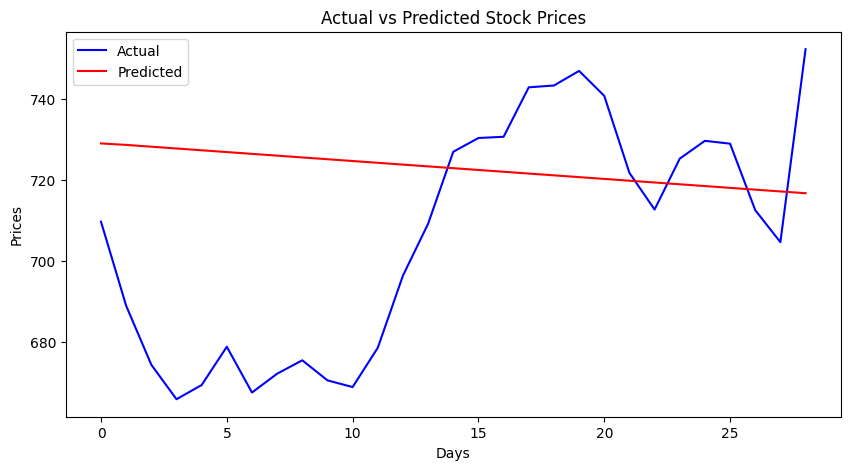

In [17]:
# Plotting actual vs predicted prices
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(actual_stock_price_test_oriA.values, color='blue', label="Actual")
plt.plot(predicted_stock_price_test_oriP.values, color='red', label="Predicted")
plt.legend()
plt.title("Actual vs Predicted Stock Prices")
plt.xlabel("Days")
plt.ylabel("Prices")
plt.show()

In [18]:
# Forecasting future prices
forecast = model_fit.predict(len(data1), len(data1) + 3)
fTestNormTable = pd.DataFrame(forecast, columns=["Closefore"])
forecast_stock_price_test_ori = MS.inverse_transform(fTestNormTable)
forecast_stock_price_test_oriF = pd.DataFrame(forecast_stock_price_test_ori, columns=["Closefore"])

In [19]:
forecast

array([0.33572176, 0.33344584, 0.33116993, 0.32889401])

In [20]:
fTestNormTable

,Closefore
0,0.335722
1,0.333446
2,0.331170
3,0.328894


In [21]:
forecast_stock_price_test_ori

array([[716.22999761],
       [715.78846938],
       [715.34694114],
       [714.90541291]])

In [22]:
forecast_stock_price_test_oriF

,Closefore
0,716.229998
1,715.788469
2,715.346941
3,714.905413


In [23]:
# Save forecasted prices to CSV
forecast_stock_price_test_oriF.to_csv("CloseMA.csv", index=False)

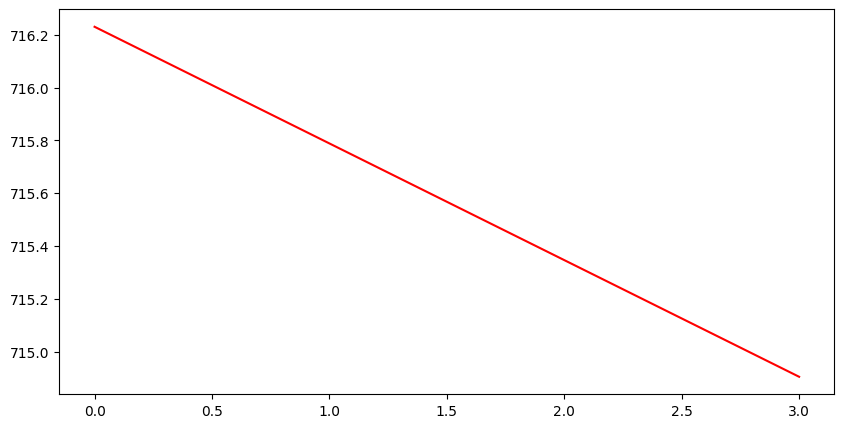

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(actual_stock_price_test_oriA[116:145], color = 'blue', label="Actual")
plt.plot(forecast_stock_price_test_oriF, color = 'red', label ="Predicted")